In [1]:
%load_ext kedro.ipython

[09/13/25 18:05:20] INFO     Using 'C:\Users\sebas\OneDrive\Desktop\MACHINE                         __init__.py:270
                             LEARNING\Kedro\nba\.venv\Lib\site-packages\kedro\framework\project\ric                
                             h_logging.yml' as logging configuration.                                              

                    INFO     Registered line magic '%reload_kedro'                                   __init__.py:63

                    INFO     Registered line magic '%load_node'                                      __init__.py:65

                    INFO     Resolved project path as: C:\Users\sebas\OneDrive\Desktop\MACHINE      __init__.py:180
                             LEARNING\Kedro\nba.                                                                   
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/13/25 18:05:22] INFO     Kedro is sending anonymous usage data with the sole purpose of improving plugin.py:243
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[09/13/25 18:05:23] INFO     Kedro project NBA                                                      __init__.py:146

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:147
                             'pipelines'                                                                           

In [22]:
import pandas as pd

import numpy as np

import seaborn as sns 

import matplotlib.pyplot as plt

%matplotlib inline   

sns.set(color_codes=True)

In [23]:
catalog.keys()


[
    'games_validated',
    'details_agg_teamgame',
    'games_clean',
    'team_features_base',
    'game_level_features',
    'model_input_classification',
    'model_input_regression',
    'eda_figs',
    'parameters',
    'params:rolling_window',
    'params:min_games_per_season',
    'params:outlier_zscore',
    'params:required_game_cols',
    'teams',
    'games',
    'games_details'
]

In [30]:
# --- Cargar datasets ---
games = catalog.load("games")
details = catalog.load("games_details")
teams = catalog.load("teams")

print(f"games: {games.shape}, details: {details.shape}, teams: {teams.shape}")

[09/13/25 19:23:38] INFO     Loading data from games (CSVDataset)...                           data_catalog.py:1046

                    INFO     Loading data from games_details (CSVDataset)...                   data_catalog.py:1046

[09/13/25 19:23:41] WARNING  C:\Users\sebas\OneDrive\Desktop\MACHINE                                warnings.py:110
                             LEARNING\Kedro\nba\.venv\Lib\site-packages\kedro_datasets\pandas\csv_d                
                             ataset.py:171: DtypeWarning: Columns (6) have mixed types. Specify                    
                             dtype option on import or set low_memory=False.                                       
                               return pd.read_csv(load_path, **self._load_args)                                    
                                                                                                                   

[09/13/25 19:23:42] INFO     Loading data from teams (CSVDataset)...                           data_catalog.py:1046

games: (26651, 21), details: (668628, 29), teams: (30, 14)


In [52]:
display(games.head())
games.info()
games.describe().T
games.tail


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,True
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,True
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,True
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,True
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE_EST     26651 non-null  datetime64[ns]
 1   GAME_ID           26651 non-null  int64         
 2   GAME_STATUS_TEXT  26651 non-null  object        
 3   HOME_TEAM_ID      26651 non-null  int64         
 4   VISITOR_TEAM_ID   26651 non-null  int64         
 5   SEASON            26651 non-null  int64         
 6   TEAM_ID_home      26651 non-null  int64         
 7   PTS_home          26552 non-null  float64       
 8   FG_PCT_home       26552 non-null  float64       
 9   FT_PCT_home       26552 non-null  float64       
 10  FG3_PCT_home      26552 non-null  float64       
 11  AST_home          26552 non-null  float64       
 12  REB_home          26552 non-null  float64       
 13  TEAM_ID_away      26651 non-null  int64         
 14  PTS_away          2655


<bound method NDFrame.tail of       GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0        2022-12-22  22200477            Final    1610612740       1610612759   
1        2022-12-22  22200478            Final    1610612762       1610612764   
2        2022-12-21  22200466            Final    1610612739       1610612749   
3        2022-12-21  22200467            Final    1610612755       1610612765   
4        2022-12-21  22200468            Final    1610612737       1610612741   
...             ...       ...              ...           ...              ...   
26646    2014-10-06  11400007            Final    1610612737       1610612740   
26647    2014-10-06  11400004            Final    1610612741       1610612764   
26648    2014-10-06  11400005            Final    1610612747       1610612743   
26649    2014-10-05  11400002            Final    1610612761       1610612758   
26650    2014-10-04  11400001            Final    1610612748       1610612740 

In [59]:
games.nunique()


GAME_DATE_EST        4304
GAME_ID             26622
GAME_STATUS_TEXT        1
HOME_TEAM_ID           30
VISITOR_TEAM_ID        30
SEASON                 20
TEAM_ID_home           30
PTS_home              100
FG_PCT_home           404
FT_PCT_home           410
FG3_PCT_home          437
AST_home               42
REB_home               55
TEAM_ID_away           30
PTS_away              106
FG_PCT_away           393
FT_PCT_away           387
FG3_PCT_away          417
AST_away               41
REB_away               52
HOME_TEAM_WINS          2
dtype: int64

In [57]:
games.describe()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
count,26651,2.665100e+04,2.665100e+04,2.665100e+04,26651.000000,2.665100e+04,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,2.665100e+04,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000
mean,2013-03-05 02:57:13.447150336,2.175487e+07,1.610613e+09,1.610613e+09,2012.113879,1.610613e+09,103.455898,0.460735,0.760377,0.356023,22.823441,43.374284,1.610613e+09,100.639876,0.449732,0.758816,0.349489,21.496271,42.113249
min,2003-10-05 00:00:00,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000
25%,2008-03-14 00:00:00,2.070001e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.422000,0.697000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000
50%,2013-02-24 00:00:00,2.120076e+07,1.610613e+09,1.610613e+09,2012.000000,1.610613e+09,103.000000,0.460000,0.765000,0.357000,23.000000,43.000000,1.610613e+09,100.000000,0.449000,0.765000,0.350000,21.000000,42.000000
75%,2017-12-18 00:00:00,2.180005e+07,1.610613e+09,1.610613e+09,2017.000000,1.610613e+09,112.000000,0.500000,0.833000,0.429000,26.000000,48.000000,1.610613e+09,110.000000,0.487000,0.833000,0.419000,25.000000,46.000000
max,2022-12-22 00:00:00,5.210021e+07,1.610613e+09,1.610613e+09,2022.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000
std,NaN,5.570189e+06,8.638670e+00,8.659299e+00,5.587031,8.638670e+00,13.283370,0.056676,0.100677,0.111164,5.193308,6.625769,8.659299e+00,13.435868,0.055551,0.103429,0.109441,5.160596,6.533039


In [48]:
def _is_true(x: pd.Series) -> pd.Series:
    return x == 1


In [49]:
games['HOME_TEAM_WINS']


0        1
1        1
2        1
3        1
4        0
        ..
26646    1
26647    0
26648    1
26649    1
26650    0
Name: HOME_TEAM_WINS, Length: 26651, dtype: int64

In [50]:
_is_true(games['HOME_TEAM_WINS'])


0         True
1         True
2         True
3         True
4        False
         ...  
26646     True
26647    False
26648     True
26649     True
26650    False
Name: HOME_TEAM_WINS, Length: 26651, dtype: bool

In [51]:
games['HOME_TEAM_WINS'] = _is_true(games['HOME_TEAM_WINS'])

In [53]:
games.isna().mean().sort_values(ascending=False)


AST_home            0.003715
FT_PCT_home         0.003715
FG3_PCT_home        0.003715
PTS_home            0.003715
FG_PCT_home         0.003715
REB_away            0.003715
AST_away            0.003715
FT_PCT_away         0.003715
FG3_PCT_away        0.003715
FG_PCT_away         0.003715
REB_home            0.003715
PTS_away            0.003715
GAME_DATE_EST       0.000000
VISITOR_TEAM_ID     0.000000
HOME_TEAM_ID        0.000000
GAME_STATUS_TEXT    0.000000
GAME_ID             0.000000
TEAM_ID_home        0.000000
SEASON              0.000000
TEAM_ID_away        0.000000
HOME_TEAM_WINS      0.000000
dtype: float64

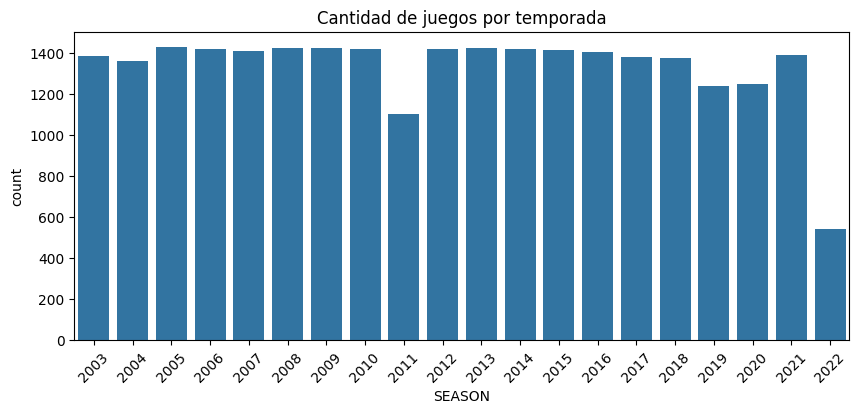

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.countplot(x="SEASON", data=games)
plt.title("Cantidad de juegos por temporada")
plt.xticks(rotation=45)
plt.show()


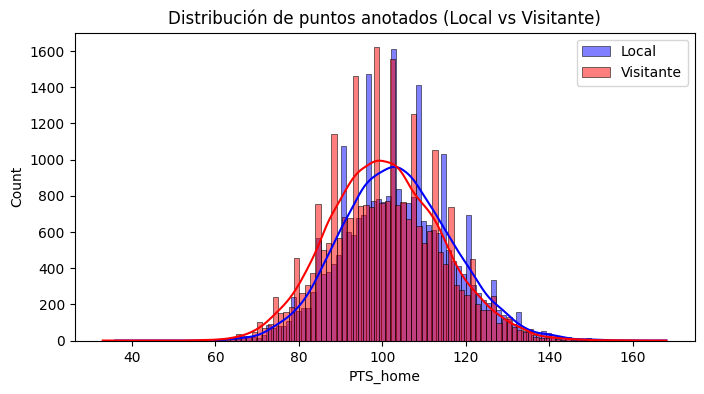

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(games["PTS_home"], kde=True, label="Local", color="blue")
sns.histplot(games["PTS_away"], kde=True, label="Visitante", color="red")
plt.legend()
plt.title("Distribución de puntos anotados (Local vs Visitante)")
plt.show()


In [12]:
games["DIFF"] = games["PTS_home"] - games["PTS_away"]

home_points = games.groupby("HOME_TEAM_ID")["PTS_home"].mean().sort_values(ascending=False)
away_points = games.groupby("VISITOR_TEAM_ID")["PTS_away"].mean().sort_values(ascending=False)

print("Top 5 equipos con más puntos en casa:")
display(home_points.head())

print("Top 5 equipos con más puntos como visitante:")
display(away_points.head())


Top 5 equipos con más puntos en casa:



HOME_TEAM_ID
1610612744    109.537611
1610612743    108.634902
1610612756    107.706081
1610612758    105.307049
1610612760    105.258137
Name: PTS_home, dtype: float64

Top 5 equipos con más puntos como visitante:



VISITOR_TEAM_ID
1610612744    105.496711
1610612756    105.218430
1610612743    103.894967
1610612745    102.864653
1610612747    102.569620
Name: PTS_away, dtype: float64

In [61]:
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
display(details.head())
details.info()
details.describe().T

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,7.0,14.0,0.500,2.0,4.0,0.500,7.0,10.0,0.7,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,6.0,9.0,0.667,0.0,0.0,0.000,1.0,1.0,1.0,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,4.0,13.0,0.308,1.0,6.0,0.167,1.0,1.0,1.0,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,7.0,12.0,0.583,1.0,3.0,0.333,4.0,4.0,1.0,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            668628 non-null  int64  
 1   TEAM_ID            668628 non-null  int64  
 2   TEAM_ABBREVIATION  668628 non-null  object 
 3   TEAM_CITY          668628 non-null  object 
 4   PLAYER_ID          668628 non-null  int64  
 5   PLAYER_NAME        668628 non-null  object 
 6   NICKNAME           53037 non-null   object 
 7   START_POSITION     255765 non-null  object 
 8   COMMENT            109689 non-null  object 
 9   MIN                558938 non-null  object 
 10  FGM                558938 non-null  float64
 11  FGA                558938 non-null  float64
 12  FG_PCT             558938 non-null  float64
 13  FG3M               558938 non-null  float64
 14  FG3A               558938 non-null  float64
 15  FG3_PCT            558938 non-null  float64
 16  FT

,count,mean,std,min,25%,50%,75%,max
GAME_ID,668628.0,2.171771e+07,5.656289e+06,1.030000e+07,2.070003e+07,2.120096e+07,2.180014e+07,5.210021e+07
TEAM_ID,668628.0,1.610613e+09,8.652260e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
PLAYER_ID,668628.0,4.013434e+05,7.225618e+06,1.500000e+01,2.466000e+03,2.011810e+05,2.034710e+05,1.962938e+09
FGM,558938.0,3.588446e+00,3.030466e+00,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,2.800000e+01
FGA,558938.0,7.896652e+00,5.677002e+00,0.000000e+00,3.000000e+00,7.000000e+00,1.100000e+01,5.000000e+01
FG_PCT,558938.0,4.168419e-01,2.519134e-01,0.000000e+00,2.670000e-01,4.290000e-01,5.710000e-01,1.000000e+00
FG3M,558938.0,7.781167e-01,1.227615e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01
FG3A,558938.0,2.186019e+00,2.569913e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,2.400000e+01
FG3_PCT,558938.0,2.010322e-01,2.896851e-01,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e-01,1.000000e+00
FTM,558938.0,1.733217e+00,2.353981e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.600000e+01


In [60]:
print('Cantidad de valores distintos de los partidos')
details.nunique()

Cantidad de valores distintos de los partidos



GAME_ID              26523
TEAM_ID                 30
TEAM_ABBREVIATION       34
TEAM_CITY               33
PLAYER_ID             2687
PLAYER_NAME           2664
NICKNAME               558
START_POSITION           3
COMMENT               5348
MIN                   3802
FGM                     26
FGA                     47
FG_PCT                 309
FG3M                    15
FG3A                    25
FG3_PCT                109
FTM                     27
FTA                     33
FT_PCT                 165
OREB                    18
DREB                    25
REB                     32
AST                     26
STL                     11
BLK                     13
TO                      13
PF                       8
PTS                     66
PLUS_MINUS             108
dtype: int64

In [14]:
display(teams.head())
teams.info()
teams.describe().T

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LEAGUE_ID           30 non-null     int64  
 1   TEAM_ID             30 non-null     int64  
 2   MIN_YEAR            30 non-null     int64  
 3   MAX_YEAR            30 non-null     int64  
 4   ABBREVIATION        30 non-null     object 
 5   NICKNAME            30 non-null     object 
 6   YEARFOUNDED         30 non-null     int64  
 7   CITY                30 non-null     object 
 8   ARENA               30 non-null     object 
 9   ARENACAPACITY       26 non-null     float64
 10  OWNER               30 non-null     object 
 11  GENERALMANAGER      30 non-null     object 
 12  HEADCOACH           30 non-null     object 
 13  DLEAGUEAFFILIATION  30 non-null     object 
dtypes: float64(1), int64(5), object(8)
memory usage: 3.4+ KB


,count,mean,std,min,25%,50%,75%,max
LEAGUE_ID,30.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
TEAM_ID,30.0,1.610613e+09,8.803408,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
MIN_YEAR,30.0,1.969700e+03,16.698441,1.946000e+03,1.952000e+03,1.970000e+03,1.979000e+03,2.002000e+03
MAX_YEAR,30.0,2.019000e+03,0.000000,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03
YEARFOUNDED,30.0,1.969700e+03,16.698441,1.946000e+03,1.952000e+03,1.970000e+03,1.979000e+03,2.002000e+03
ARENACAPACITY,26.0,1.855331e+04,3916.923362,0.000000e+00,1.864150e+04,1.913100e+04,1.979075e+04,2.171100e+04


In [18]:
print('Cantidad de valores distintos de los equipos')
teams.nunique()

Cantidad de valores distintos de los equipos



LEAGUE_ID              1
TEAM_ID               30
MIN_YEAR              15
MAX_YEAR               1
ABBREVIATION          30
NICKNAME              30
YEARFOUNDED           15
CITY                  29
ARENA                 29
ARENACAPACITY         24
OWNER                 30
GENERALMANAGER        30
HEADCOACH             30
DLEAGUEAFFILIATION    28
dtype: int64

In [62]:
dif = teams['YEARFOUNDED'] != teams['MIN_YEAR']
display(dif)



0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [63]:
num_diff = teams['YEARFOUNDED'] != teams['MIN_YEAR'].sum()
print(f"Hay {num_diff} valores diferentes")


Hay 0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
Name: YEARFOUNDED, dtype: bool valores diferentes
